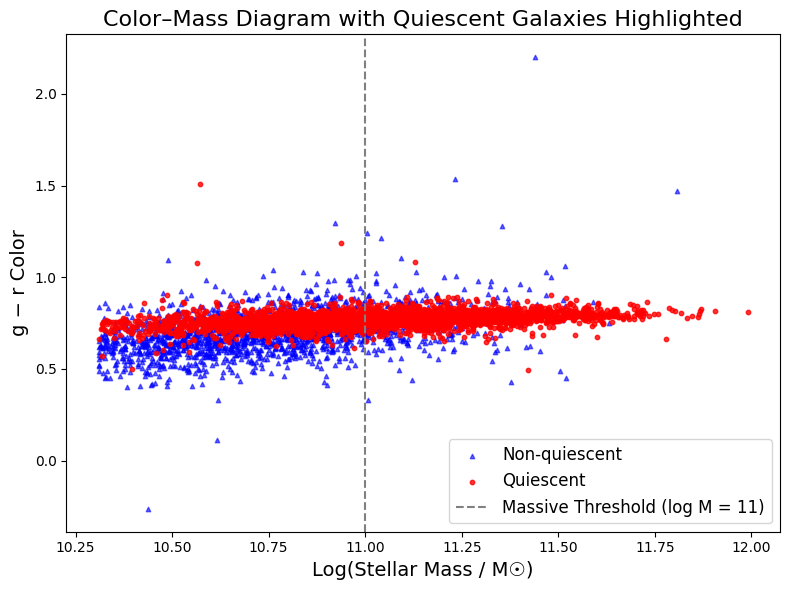

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load the Full Dataset ===
# Make sure 'Full.csv' is in your working directory.
df = pd.read_csv("Subset")

# === Apply Holden et al. (2012) Criteria to Define Quiescent Galaxies ===
# A galaxy is considered "quiescent" if it satisfies all three conditions:
# 1) (u - r) > 2.26
# 2) (r - z) < 0.75
# 3) (u - r) > 0.76 + 2.5 * (r - z)
df["quiescent"] = (
    (df["𝑢 − 𝑟 color"] > 2.26) &
    (df["𝑟 − 𝑧 color"] < 0.75) &
    (df["𝑢 − 𝑟 color"] > (0.76 + 2.5 * df["𝑟 − 𝑧 color"]))
)

# === Create the Color–Mass Plot ===
plt.figure(figsize=(8, 6))

# Plot non-quiescent galaxies in blue (triangles)
plt.scatter(
    df.loc[~df["quiescent"], "Log base-10 of the stellar mass"],
    df.loc[~df["quiescent"], "𝑔 − 𝑟 color"],
    color='blue', marker='^', s=10, alpha=0.6, label='Non-quiescent'
)

# Plot quiescent galaxies in red (circles)
plt.scatter(
    df.loc[df["quiescent"], "Log base-10 of the stellar mass"],
    df.loc[df["quiescent"], "𝑔 − 𝑟 color"],
    color='red', marker='o', s=10, alpha=0.8, label='Quiescent'
)

# === Customize the Plot ===
plt.axvline(x=11, linestyle='--', color='gray', label='Massive Threshold (log M = 11)')
plt.xlabel('Log(Stellar Mass / M☉)', fontsize=14)
plt.ylabel('g − r Color', fontsize=14)
plt.title('Color–Mass Diagram with Quiescent Galaxies Highlighted', fontsize=16)
plt.legend(fontsize=12)
plt.tight_layout()

# === Save and Show the Figure ===
plt.savefig("Task4_ColorMass_Quiescent.png")
plt.show()

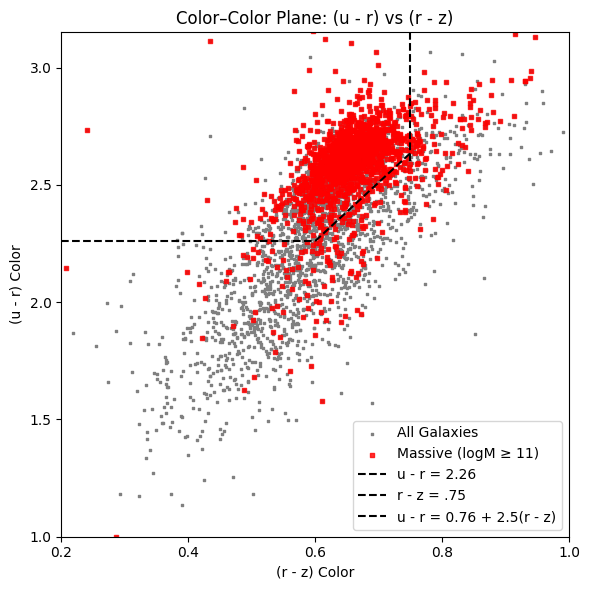

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Try to load the subset CSV, prompt for upload if not found
try:
    df = pd.read_csv('Subset-17col.csv')
except FileNotFoundError:
    print("File 'Subset-17col.csv' not found. Please upload it:")
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    df = pd.read_csv(filename)

# Define the color indices
df['u_r'] = df['uMag_o'] - df['rMag_o']
df['r_z'] = df['rMag_o'] - df['zMag_o']

# Select massive galaxies
massive = df[df['Log base-10 of the stellar mass'] >= 11]

# Create the plot
plt.figure(figsize=(6, 6))

# Plot all galaxies in grey squares
plt.scatter(df['r_z'], df['u_r'],
            color='grey', marker='s', s=2, alpha=1, label='All Galaxies')

# Overplot massive galaxies in red
plt.scatter(massive['r_z'], massive['u_r'],
            color='red', marker='s', s=8, alpha=0.8, label='Massive (logM ≥ 11)')

# Quiescent region boundaries
# Horizontal line u - r = 2.26
hx = [0.2, .6]
hy = [2.26, 2.26]
plt.plot(hx, hy, color='black', linestyle='--', linewidth=1.5,
         label='u - r = 2.26')

# Quiescent region boundaries
# Horizontal line u - r = 2.26
hx = [0.75, .75]
hy = [3.15, 2.6]
plt.plot(hx, hy, color='black', linestyle='--', linewidth=1.5,
         label='r - z = .75')


# Diagonal line u - r = 0.76 + 2.5*(r - z)
rz_vals = np.linspace(0.6, 0.75, 200)
plt.plot(rz_vals, 0.76 + 2.5 * rz_vals,
         color='black', linestyle='--', linewidth=1.5,
         label='u - r = 0.76 + 2.5(r - z)')

# Axis limits and ticks
plt.xlim(0.2, 1.0)
plt.ylim(1.0, 3.15)
plt.xticks([0.2, 0.4, 0.6, 0.8, 1.0])
plt.yticks([1.0, 1.5, 2.0, 2.5, 3.0])

# Labels, title, legend
plt.xlabel('(r - z) Color')
plt.ylabel('(u - r) Color')
plt.title('Color–Color Plane: (u - r) vs (r - z)')
plt.legend()

# Tight layout and display
plt.tight_layout()
plt.show()


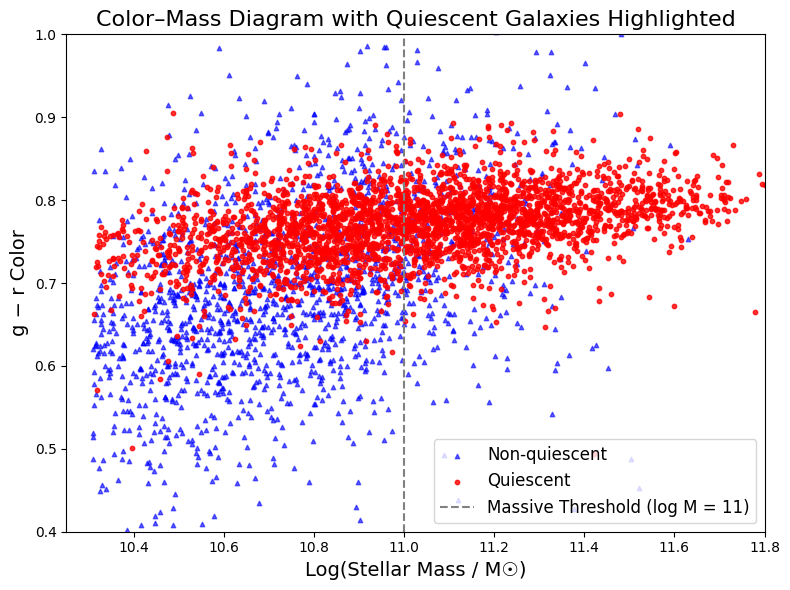

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load the Full Dataset ===
# Make sure 'Full.csv' is in your working directory.
df = pd.read_csv("Subset-17col.csv")

# === Apply Holden et al. (2012) Criteria to Define Quiescent Galaxies ===
# A galaxy is considered "quiescent" if it satisfies all three conditions:
# 1) (u - r) > 2.26
# 2) (r - z) < 0.75
# 3) (u - r) > 0.76 + 2.5 * (r - z)
df["quiescent"] = (
    (df["𝑢 − 𝑟 color"] > 2.26) &
    (df["𝑟 − 𝑧 color"] < 0.75) &
    (df["𝑢 − 𝑟 color"] > (0.76 + 2.5 * df["𝑟 − 𝑧 color"]))
)

# === Create the Color–Mass Plot ===
plt.figure(figsize=(8, 6))

# Plot non-quiescent galaxies in blue (triangles)
plt.scatter(
    df.loc[~df["quiescent"], "Log base-10 of the stellar mass"],
    df.loc[~df["quiescent"], "𝑔 − 𝑟 color"],
    color='blue', marker='^', s=10, alpha=0.6, label='Non-quiescent'
)

# Plot quiescent galaxies in red (circles)
plt.scatter(
    df.loc[df["quiescent"], "Log base-10 of the stellar mass"],
    df.loc[df["quiescent"], "𝑔 − 𝑟 color"],
    color='red', marker='o', s=10, alpha=0.8, label='Quiescent'
)

# === Customize the Plot ===
plt.axvline(x=11, linestyle='--', color='gray', label='Massive Threshold (log M = 11)')
plt.xlim(10.25, 11.8)
plt.ylim(.4, 1)
plt.xlabel('Log(Stellar Mass / M☉)', fontsize=14)
plt.ylabel('g − r Color', fontsize=14)
plt.title('Color–Mass Diagram with Quiescent Galaxies Highlighted', fontsize=16)
plt.legend(fontsize=12)
plt.tight_layout()

# === Save and Show the Figure ===
plt.savefig("Task4_ColorMass_Quiescent.png")
plt.show()

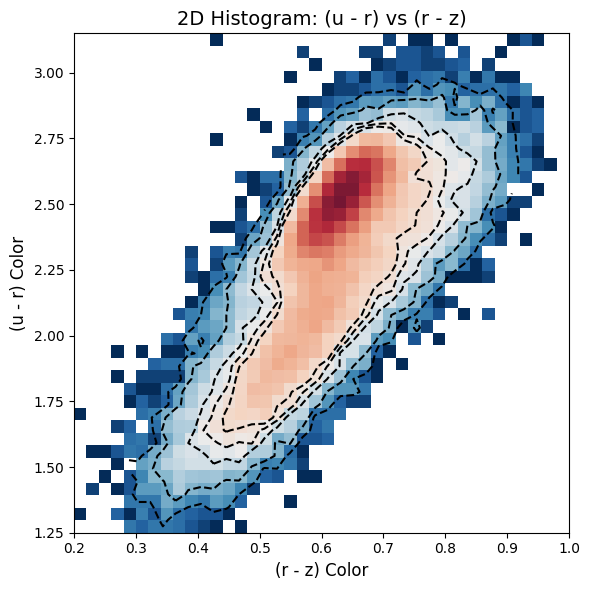

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Load the CSV file
df = pd.read_csv('Full-17col.csv')  # Replace with full path if needed

# Compute color indices
df['u_r'] = df['uMag_o'] - df['rMag_o']
df['r_z'] = df['rMag_o'] - df['zMag_o']

# Create the grayscale 2D histogram plot
plt.figure(figsize=(6, 6))
plt.hist2d(
    df['r_z'], df['u_r'],
    range=[[0.2, 1.0], [1.25, 3.15]],
    bins=40,
    cmap='gray',
    norm=LogNorm(),
    cmin=3
)

hist,xbins,ybins,mesh = plt.hist2d(df['r_z'], df['u_r'],range=[[0.2, 1.0], [1.25,
3.15]], bins=40, cmap='RdBu_r', norm=LogNorm(), cmin=3, alpha=0.7)

plt.contour(hist.transpose(), levels = [10,20,50,75,100], extent=[xbins.min(),
xbins.max(), ybins.min(), ybins.max()], linewidths=1.5, colors='black',
linestyles='--')

# Add and label the grayscale colorbar
plt.hist2d(df['r_z'], df['u_r'], range=[[0.2, 1.0], [1.25, 3.15]], bins=40,
cmap='RdBu_r', norm=LogNorm(), cmin=3, alpha=0.7)

# Label axes and add a title
plt.xlabel('(r - z) Color', fontsize=12)
plt.ylabel('(u - r) Color', fontsize=12)
plt.title('2D Histogram: (u - r) vs (r - z)', fontsize=14)

# Tight layout and show plot
plt.tight_layout()
plt.show()


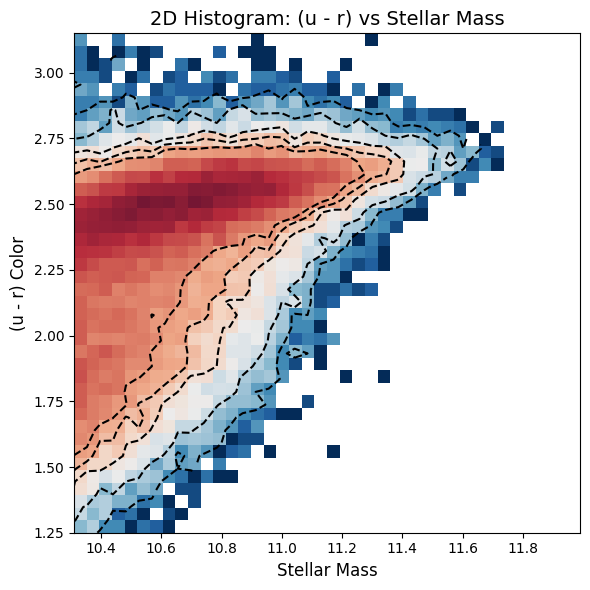

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Load the CSV file
df = pd.read_csv('Full-17col.csv')  # Replace with full path if needed

# Compute color indices
df['u_r'] = df['uMag_o'] - df['rMag_o']
df['r_z'] = df['rMag_o'] - df['zMag_o']  # No longer used, but can keep if needed

# Create the grayscale 2D histogram plot
plt.figure(figsize=(6, 6))
plt.hist2d(
    df['Log base-10 of the stellar mass'], df['u_r'],
    range=[[df['Log base-10 of the stellar mass'].min(), df['Log base-10 of the stellar mass'].max()], [1.25, 3.15]],
    bins=40,
    cmap='gray',
    norm=LogNorm(),
    cmin=3
)

# Create and plot histogram with contours
hist, xbins, ybins, mesh = plt.hist2d(
    df['Log base-10 of the stellar mass'], df['u_r'],
    range=[[df['Log base-10 of the stellar mass'].min(), df['Log base-10 of the stellar mass'].max()], [1.25, 3.15]],
    bins=40,
    cmap='RdBu_r',
    norm=LogNorm(),
    cmin=3,
    alpha=0.7
)

plt.contour(
    hist.transpose(),
    levels=[10, 20, 50, 75, 100],
    extent=[xbins.min(), xbins.max(), ybins.min(), ybins.max()],
    linewidths=1.5,
    colors='black',
    linestyles='--'
)

# Add and label the colorbar histogram again (if desired)
plt.hist2d(
    df['Log base-10 of the stellar mass'], df['u_r'],
    range=[[df['Log base-10 of the stellar mass'].min(), df['Log base-10 of the stellar mass'].max()], [1.25, 3.15]],
    bins=40,
    cmap='RdBu_r',
    norm=LogNorm(),
    cmin=3,
    alpha=0.7
)

# Label axes and add a title
plt.xlabel('Stellar Mass', fontsize=12)
plt.ylabel('(u - r) Color', fontsize=12)
plt.title('2D Histogram: (u - r) vs Stellar Mass', fontsize=14)

# Tight layout and show plot
plt.tight_layout()
plt.show()


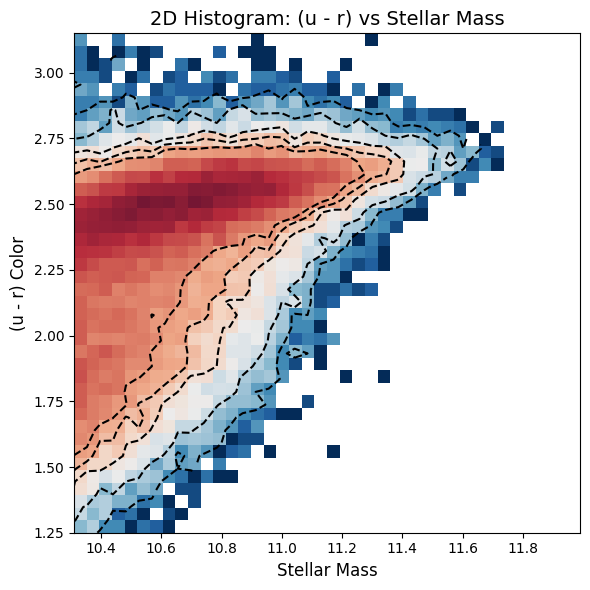

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Load the CSV file
df = pd.read_csv('Full-17col.csv')  # Replace with full path if needed

# Compute color indices
df['u_r'] = df['uMag_o'] - df['rMag_o']
df['r_z'] = df['rMag_o'] - df['zMag_o']  # No longer used, but can keep if needed

# Create the grayscale 2D histogram plot
plt.figure(figsize=(6, 6))
plt.hist2d(
 df['Log base-10 of the stellar mass'], df['u_r'],
    range=[[df['Log base-10 of the stellar mass'].min(), df['Log base-10 of the stellar mass'].max()], [1.25, 3.15]],
    bins=40,
    cmap='gray',
    norm=LogNorm(),
    cmin=3
)

# Create and plot histogram with contours
hist, xbins, ybins, mesh = plt.hist2d(
    df['Log base-10 of the stellar mass'], df['u_r'],
    range=[[df['Log base-10 of the stellar mass'].min(), df['Log base-10 of the stellar mass'].max()], [1.25, 3.15]],
    bins=40,
    cmap='RdBu_r',
    norm=LogNorm(),
    cmin=3,
    alpha=0.7
)

plt.contour(
    hist.transpose(),
    levels=[10, 20, 50, 75, 100],
    extent=[xbins.min(), xbins.max(), ybins.min(), ybins.max()],
    linewidths=1.5,
    colors='black',
    linestyles='--'
)

# Add and label the colorbar histogram again (if desired)
plt.hist2d(
    df['Log base-10 of the stellar mass'], df['u_r'],
    range=[[df['Log base-10 of the stellar mass'].min(), df['Log base-10 of the stellar mass'].max()], [1.25, 3.15]],
    bins=40,
    cmap='RdBu_r',
    norm=LogNorm(),
    cmin=3,
    alpha=0.7
)

# Label axes and add a title
plt.xlabel('Stellar Mass', fontsize=12)
plt.ylabel('(u - r) Color', fontsize=12)
plt.title('2D Histogram: (u - r) vs Stellar Mass', fontsize=14)

# Tight layout and show plot
plt.tight_layout()
plt.show()

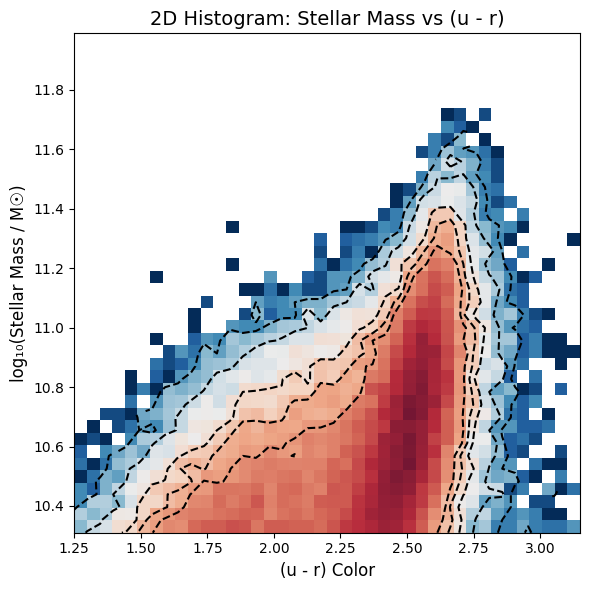

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the CSV file
df = pd.read_csv('Full-17col.csv')  # Replace with full path if needed

# Compute color index
df['u_r'] = df['uMag_o'] - df['rMag_o']

# Set up figure
plt.figure(figsize=(6, 6))

# Histogram with grayscale background (axes swapped)
plt.hist2d(
    df['u_r'], df['Log base-10 of the stellar mass'],
    range=[[1.25, 3.15], [df['Log base-10 of the stellar mass'].min(), df['Log base-10 of the stellar mass'].max()]],
    bins=40,
    cmap='gray',
    norm=LogNorm(),
    cmin=3
)

# Overlay histogram with color (axes swapped)
hist, xbins, ybins, mesh = plt.hist2d(
    df['u_r'], df['Log base-10 of the stellar mass'],
    range=[[1.25, 3.15], [df['Log base-10 of the stellar mass'].min(), df['Log base-10 of the stellar mass'].max()]],
    bins=40,
    cmap='RdBu_r',
    norm=LogNorm(),
    cmin=3,
    alpha=0.7
)

plt.contour(
    hist.T,  # ← this transpose is needed when axes are swapped
    levels=[10, 20, 50, 75, 100],
    extent=[xbins.min(), xbins.max(), ybins.min(), ybins.max()],
    linewidths=1.5,
    colors='black',
    linestyles='--'
)

# Optional: re-plot the colored histogram
plt.hist2d(
    df['u_r'], df['Log base-10 of the stellar mass'],
    range=[[1.25, 3.15], [df['Log base-10 of the stellar mass'].min(), df['Log base-10 of the stellar mass'].max()]],
    bins=40,
    cmap='RdBu_r',
    norm=LogNorm(),
    cmin=3,
    alpha=0.7
)

# Updated labels
plt.xlabel('(u - r) Color', fontsize=12)
plt.ylabel('log₁₀(Stellar Mass / M☉)', fontsize=12)
plt.title('2D Histogram: Stellar Mass vs (u - r)', fontsize=14)

plt.tight_layout()
plt.show()

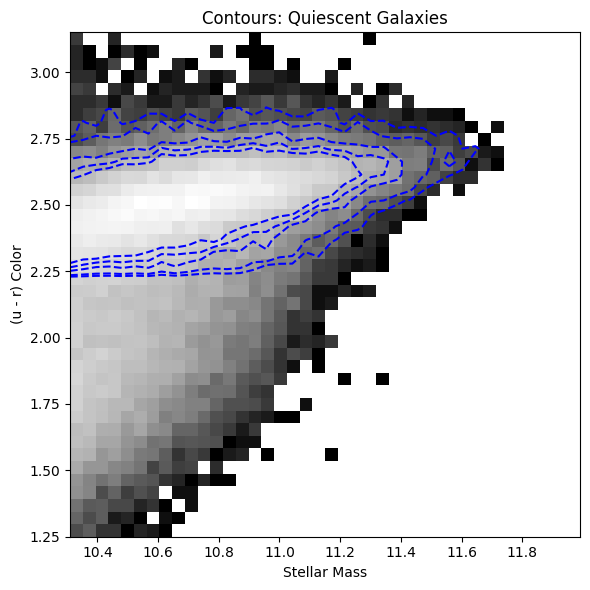

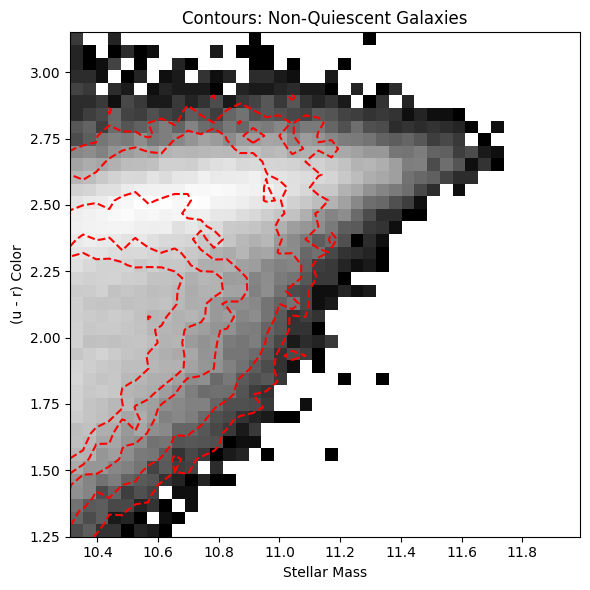

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Load the CSV file
df = pd.read_csv('Full-17col.csv')

# Compute color indices
df['u_r'] = df['uMag_o'] - df['rMag_o']
df['r_z'] = df['rMag_o'] - df['zMag_o']

# Define quiescent galaxies
df['quiescent'] = (
    (df['u_r'] > 2.26) &
    (df['r_z'] < 0.75) &
    (df['u_r'] > 0.76 + 2.5 * df['r_z'])
)

# Define x and y ranges
x_range = [df['Log base-10 of the stellar mass'].min(), df['Log base-10 of the stellar mass'].max()]
y_range = [1.25, 3.15]
bins = 40

# Split the DataFrame
quiescent_df = df[df['quiescent']]
non_quiescent_df = df[~df['quiescent']]

# --- Plot for QUIESCENT galaxies ---
plt.figure(figsize=(6, 6))
plt.hist2d(
    df['Log base-10 of the stellar mass'], df['u_r'],
    range=[x_range, y_range],
    bins=bins,
    cmap='gray',
    norm=LogNorm(),
    cmin=3
)

hist_q, xbins_q, ybins_q = np.histogram2d(
    quiescent_df['Log base-10 of the stellar mass'], quiescent_df['u_r'],
    bins=bins,
    range=[x_range, y_range]
)

plt.contour(
    hist_q.T,
    levels=[10, 20, 50, 75, 100],
    extent=[xbins_q.min(), xbins_q.max(), ybins_q.min(), ybins_q.max()],
    linewidths=1.5,
    colors='blue',
    linestyles='--'
)

plt.title('Contours: Quiescent Galaxies')
plt.xlabel('Stellar Mass')
plt.ylabel('(u - r) Color')
plt.tight_layout()
plt.show()

# --- Plot for NON-QUIESCENT galaxies ---
plt.figure(figsize=(6, 6))
plt.hist2d(
    df['Log base-10 of the stellar mass'], df['u_r'],
    range=[x_range, y_range],
    bins=bins,
    cmap='gray',
    norm=LogNorm(),
    cmin=3
)

hist_nq, xbins_nq, ybins_nq = np.histogram2d(
    non_quiescent_df['Log base-10 of the stellar mass'], non_quiescent_df['u_r'],
    bins=bins,
    range=[x_range, y_range]
)

plt.contour(
    hist_nq.T,
    levels=[10, 20, 50, 75, 100],
    extent=[xbins_nq.min(), xbins_nq.max(), ybins_nq.min(), ybins_nq.max()],
    linewidths=1.5,
    colors='red',
    linestyles='--'
)


plt.title('Contours: Non-Quiescent Galaxies')
plt.xlabel('Stellar Mass')
plt.ylabel('(u - r) Color')
plt.tight_layout()
plt.show()


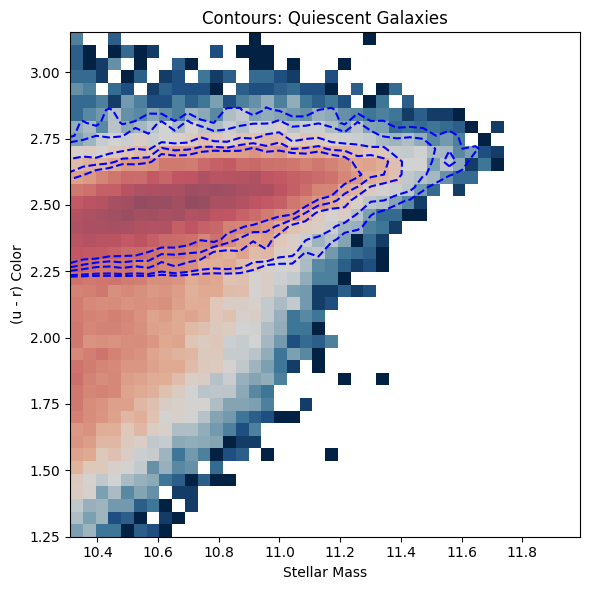

<ipython-input-6-99496e70636f>:118: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


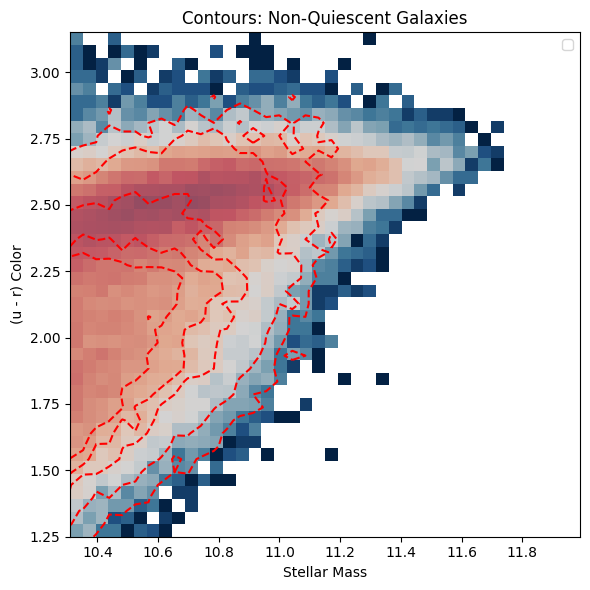

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Load the CSV file
df = pd.read_csv('Full-17col.csv')

# Compute color indices
df['u_r'] = df['uMag_o'] - df['rMag_o']
df['r_z'] = df['rMag_o'] - df['zMag_o']

# Define quiescent galaxies
df['quiescent'] = (
    (df['u_r'] > 2.26) &
    (df['r_z'] < 0.75) &
    (df['u_r'] > 0.76 + 2.5 * df['r_z'])
)

# Define axis range and bins
x_range = [df['Log base-10 of the stellar mass'].min(), df['Log base-10 of the stellar mass'].max()]
y_range = [1.25, 3.15]
bins = 40

# Split the DataFrame
quiescent_df = df[df['quiescent']]
non_quiescent_df = df[~df['quiescent']]

# ----------------------------
# Plot 1: Quiescent Contours
# ----------------------------
plt.figure(figsize=(6, 6))

# Background gray histogram
plt.hist2d(
    df['Log base-10 of the stellar mass'], df['u_r'],
    range=[x_range, y_range],
    bins=bins,
    cmap='gray',
    norm=LogNorm(),
    cmin=3
)

# Overlay colored histogram (all data)
plt.hist2d(
    df['Log base-10 of the stellar mass'], df['u_r'],
    range=[x_range, y_range],
    bins=bins,
    cmap='RdBu_r',
    norm=LogNorm(),
    cmin=3,
    alpha=0.7
)

# Quiescent contours
hist_q, xbins_q, ybins_q = np.histogram2d(
    quiescent_df['Log base-10 of the stellar mass'], quiescent_df['u_r'],
    bins=bins,
    range=[x_range, y_range]
)

plt.contour(
    hist_q.T,
    levels=[10, 20, 50, 75, 100],
    extent=[xbins_q.min(), xbins_q.max(), ybins_q.min(), ybins_q.max()],
    linewidths=1.5,
    colors='blue',
    linestyles='--'
)

plt.title('Contours: Quiescent Galaxies')
plt.xlabel('Stellar Mass')
plt.ylabel('(u - r) Color')
plt.tight_layout()
plt.show()

# ----------------------------
# Plot 2: Non-Quiescent Contours
# ----------------------------
plt.figure(figsize=(6, 6))

# Background gray histogram
plt.hist2d(
    df['Log base-10 of the stellar mass'], df['u_r'],
    range=[x_range, y_range],
    bins=bins,
    cmap='gray',
    norm=LogNorm(),
    cmin=3
)

# Overlay colored histogram (all data)
plt.hist2d(
    df['Log base-10 of the stellar mass'], df['u_r'],
    range=[x_range, y_range],
    bins=bins,
    cmap='RdBu_r',
    norm=LogNorm(),
    cmin=3,
    alpha=0.7
)

# Non-quiescent contours
hist_nq, xbins_nq, ybins_nq = np.histogram2d(
    non_quiescent_df['Log base-10 of the stellar mass'], non_quiescent_df['u_r'],
    bins=bins,
    range=[x_range, y_range]
)

plt.contour(
    hist_nq.T,
    levels=[10, 20, 50, 75, 100],
    extent=[xbins_nq.min(), xbins_nq.max(), ybins_nq.min(), ybins_nq.max()],
    linewidths=1.5,
    colors='red',
    linestyles='--'
)

plt.title('Contours: Non-Quiescent Galaxies')
plt.xlabel('Stellar Mass')
plt.ylabel('(u - r) Color')
plt.tight_layout()
plt.show()


In [ ]:
# Define massive galaxies
df['massive'] = df['Log base-10 of the stellar mass'] > 10.5

# Categorize into the 4 subpopulations
categories = {
    'Massive & Quiescent': ((df['massive']) & (df['quiescent'])),
    'Massive & Star-forming': ((df['massive']) & (~df['quiescent'])),
    'Low-mass & Quiescent': ((~df['massive']) & (df['quiescent'])),
    'Low-mass & Star-forming': ((~df['massive']) & (~df['quiescent']))
}

# Count the galaxies in each category
data = {label: df[mask].shape[0] for label, mask in categories.items()}

# Create DataFrame
import pandas as pd
table_df = pd.DataFrame.from_dict(data, orient='index', columns=['Galaxy Count'])
table_df['Fraction of Total'] = table_df['Galaxy Count'] / table_df['Galaxy Count'].sum()

# Format as percent
table_df['Fraction of Total'] = table_df['Fraction of Total'].apply(lambda x: f"{x:.2%}")

# Display table with caption
print("Table: Statistical Breakdown of Galaxies by Mass and Quiescence")
display(table_df)

Table: Statistical Breakdown of Galaxies by Mass and Quiescence


,Galaxy Count,Fraction of Total
Massive & Quiescent,26849,42.32%
Massive & Star-forming,16991,26.78%
Low-mass & Quiescent,7228,11.39%
Low-mass & Star-forming,12377,19.51%
